In [1]:
#Import needed libraries and get data
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_table('train.tsv')
data

/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [2]:
data["containsSpaces"] = data["Phrase"].apply(lambda x: ' ' not in x)
single_words = data[data.containsSpaces == True]
print data.isnull().sum()
data.describe()

PhraseId          0
SentenceId        0
Phrase            0
Sentiment         0
containsSpaces    0
dtype: int64


,PhraseId,SentenceId,Sentiment,containsSpaces
count,156060.000000,156060.000000,156060.000000,156060
mean,78030.500000,4079.732744,2.063578,0.105927
std,45050.785842,2502.764394,0.893832,0.307745
min,1.000000,1.000000,0.000000,False
25%,39015.750000,1861.750000,2.000000,0
50%,78030.500000,4017.000000,2.000000,0
75%,117045.250000,6244.000000,3.000000,0
max,156060.000000,8544.000000,4.000000,True


In [3]:
sent1 = data[data.SentenceId == 1]
phrase = sent1[sent1.PhraseId == 1].Phrase
for i in phrase:
    print i

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .


In [4]:
sent1 = data[data.SentenceId == 1]
phrase = sent1[sent1.PhraseId == 2].Phrase
for i in phrase:
    print i

A series of escapades demonstrating the adage that what is good for the goose


In [5]:
sent1 = data[data.SentenceId == 1]
phrase = sent1[sent1.PhraseId == 3].Phrase
for i in phrase:
    print i

A series


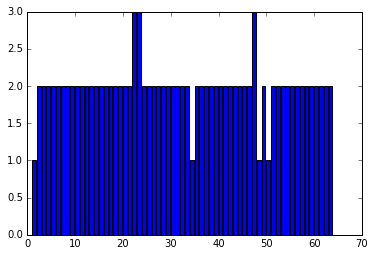

In [6]:
x = sent1.PhraseId
y = sent1.Sentiment
plt.bar(x,y)
plt.show()

In [7]:
sentences = data.groupby('SentenceId').first().reset_index()
sentences

,SentenceId,PhraseId,Phrase,Sentiment,containsSpaces
0,1,1,A series of escapades demonstrating the adage ...,1,False
1,2,64,"This quiet , introspective and entertaining in...",4,False
2,3,82,"Even fans of Ismail Merchant 's work , I suspe...",1,False
3,4,117,A positively thrilling combination of ethnogra...,3,False
4,5,157,Aggressive self-glorification and a manipulati...,1,False
5,6,167,A comedy-drama of nearly epic proportions root...,4,False
6,7,199,"Narratively , Trouble Every Day is a plodding ...",1,False
7,8,214,"The Importance of Being Earnest , so thick wit...",3,False
8,9,248,But it does n't leave you with much .,1,False
9,10,260,You could hate it for the same reason .,1,False


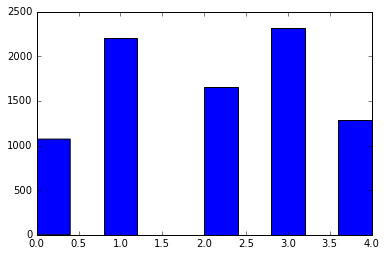

In [8]:
x = sentences.PhraseId
y = sentences.Sentiment
plt.hist(y)
plt.show()

In [9]:
super_pos = sentences[sentences.Sentiment == 4]
pos = sentences[sentences.Sentiment == 3]
neutral = sentences[sentences.Sentiment == 2]
neg = sentences[sentences.Sentiment == 1]
super_neg = sentences[sentences.Sentiment == 0]
print len(super_pos), len(pos), len(neutral), len(neg), len(super_neg), len(sentences)

1281 2321 1655 2200 1072 8529


In [10]:
super_pos.reset_index()

,index,SentenceId,PhraseId,Phrase,Sentiment,containsSpaces
0,1,2,64,"This quiet , introspective and entertaining in...",4,False
1,5,6,167,A comedy-drama of nearly epic proportions root...,4,False
2,12,13,353,The performances are an absolute joy .,4,False
3,20,21,552,"Best indie of the year , so far .",4,False
4,42,43,1165,If a horror movie 's primary goal is to fright...,4,False
5,48,49,1305,Jones has tackled a meaty subject and drawn en...,4,False
6,49,50,1333,Bloody Sunday has the grace to call for preven...,4,False
7,54,55,1506,Perhaps it 's cliche to call the film ` refres...,4,False
8,55,56,1523,Both lead performances are Oscar-size .,4,False
9,66,67,1799,"A smart , provocative drama that does the near...",4,False


In [11]:
super_pos_sentences = super_pos.SentenceId
super_pos_lines = data[data['SentenceId'].apply(lambda x: x in super_pos_sentences)]
super_pos_sentiment = super_pos_lines[super_pos_lines.containsSpaces == False].Sentiment.mean()

pos_sentences = pos.SentenceId
pos_lines = data[data['SentenceId'].apply(lambda x: x in pos_sentences)]
pos_sentiment = pos_lines[pos_lines.containsSpaces == False].Sentiment.mean()

neutral_sentences = neutral.SentenceId
neutral_lines = data[data['SentenceId'].apply(lambda x: x in neutral_sentences)]
neutral_sentiment = neutral_lines[neutral_lines.containsSpaces == False].Sentiment.mean()

neg_sentences = neg.SentenceId
neg_lines = data[data['SentenceId'].apply(lambda x: x in neg_sentences)]
neg_sentiment = neg_lines[neg_lines.containsSpaces == False].Sentiment.mean()

super_neg_sentences = super_neg.SentenceId
super_neg_lines = data[data['SentenceId'].apply(lambda x: x in super_neg_sentences)]
super_neg_sentiment = super_neg_lines[super_neg_lines.containsSpaces == False].Sentiment.mean()

print super_pos_sentiment, pos_sentiment, neutral_sentiment, neg_sentiment, super_neg_sentiment

2.08715374964 2.06420503682 2.05043005219 2.08405088606 2.0729893073


In [12]:
phrase = str(super_pos[super_pos.SentenceId == 8249].Phrase)
phrase = phrase.split()

In [ ]:
for i in range(1, len(phrase)-4):
    print single_words[single_words.Phrase == phrase[i]].Sentiment

In [75]:
phrases_sent = []
for index, row in super_pos.iterrows():
    phrase = row['Phrase'].split()
    extreme_sentiments = []
    all_sentiments = []
    neutral_count = 0
    other_count = 0
    words = len(phrase)
    for i in phrase:
        sent = single_words[single_words.Phrase == i]
        try:
            if int(sent.Sentiment) != 2:
                extreme_sentiments.append(int(sent.Sentiment))
                other_count += 1
            else:
                neutral_count += 1
            all_sentiments.append(int(sent.Sentiment))
        except:
            pass
    mean = sum(all_sentiments)/float(words)
    phrases_sent.append((words, extreme_sentiments, other_count, all_sentiments, neutral_count, mean))
phrases_sent


[(11, [4], 1, [2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2], 10, 2.1818181818181817),
 (19,
  [3, 3, 3],
  3,
  [2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2],
  15,
  2.0526315789473686),
 (7, [4], 1, [2, 2, 2, 2, 4, 2], 5, 2.0),
 (9, [4], 1, [4, 2, 2, 2, 2, 2, 2, 2, 2], 8, 2.2222222222222223),
 (25,
  [1, 3, 1, 4, 3, 3],
  6,
  [1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 3, 2, 2, 3, 2, 2, 2, 2],
  17,
  1.96),
 (18,
  [3, 4, 4],
  3,
  [2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2],
  13,
  2.0555555555555554),
 (26,
  [1, 3, 1],
  3,
  [1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2],
  22,
  1.8846153846153846),
 (16, [1, 3], 2, [2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2], 14, 2.0),
 (6, [], 0, [2, 2, 2, 2, 2, 2], 6, 2.0),
 (29,
  [4, 3, 1, 0, 1, 1],
  6,
  [2,
   4,
   2,
   3,
   1,
   2,
   2,
   2,
   2,
   0,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   2,
   1,
   2,
   2],
  20,
  1.7241379310344827),
 (12,
  [4, 

In [76]:
phrases_sent.sort(key=lambda x:x[0], reverse=True)

[(52,
  [1, 3, 3],
  3,
  [2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   3,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   3,
   2,
   2,
   2,
   2,
   2,
   2],
  43,
  1.7884615384615385),
 (52,
  [3, 3, 1, 1, 3, 3, 3],
  7,
  [2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   3,
   2,
   2,
   2,
   3,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   3,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   3,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   3,
   2,
   2],
  41,
  1.9038461538461537),
 (48,
  [3, 1, 4, 3, 1, 3, 3],
  7,
  [2,
   2,
   2,
   2,
   2,
   3,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   4,
   2,
   2,
   2,
   2,
   2,
   3,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   3,
   2,
   2,
   2,
   2,
   2,
   3,
   2],
  3

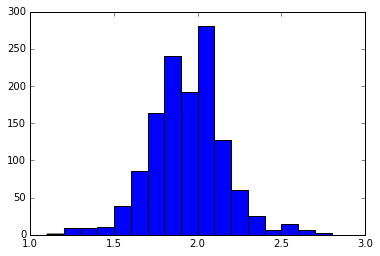

In [94]:
data = []
for i in phrases_sent:
    data.append(i[5])
plt.hist(data, bins=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9])
plt.show()

In [99]:
extreme = []
for i in phrases_sent:
    print i[3]
    extreme.append(i[3][0])

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2]
[2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2]
[2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2]
[2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2]
[2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3,

Through this ipython notebook, we explored how reviews and sentences gain their sentiment rating. To do this, we split the dataset into super positive, positive, neutral, negative, and super negative sentences. With this, we then made lists with the length of each review, a list of words that don't have a sentiment of 2, all the word sentiments, lengths, and mean sentiment of the words in the review. Then, we plotted this in bins in a histogram. This graph show above) shows, for super positive reviews, average sentiments ranging from 1-2.5. With this information, we can see that a unigram model is less than ideal for estimating parameters and getting overall sentiment, so moving forward we will look into n-gram models instead. 